In [1]:
import import_ipynb
import numpy as np
import pandas as pd
import Utils
import matplotlib.pyplot as plt

importing Jupyter notebook from Utils.ipynb


In [2]:
train_feature = pd.read_csv("../../Data/Mechanisms of Action (MoA) Prediction/train_features.csv")
test_feature = pd.read_csv("../../Data/Mechanisms of Action (MoA) Prediction/test_features.csv")
train_targets_scored = pd.read_csv("../../Data/Mechanisms of Action (MoA) Prediction/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../../Data/Mechanisms of Action (MoA) Prediction/train_targets_nonscored.csv")


In [3]:
df = Utils.datainfo(train_feature)

In [4]:
df.data_shape()

Rows: 23814 and columns: 876


In [5]:
df.data_head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
df.data_missing()

No missing data


In [7]:
Utils.binary_sparse(train_targets_scored)

Percentage of non-zero target class values: 0.34169807960161463%


In [8]:
Utils.binary_sparse(train_targets_nonscored)

Percentage of non-zero target class values: 0.052182745475116185%


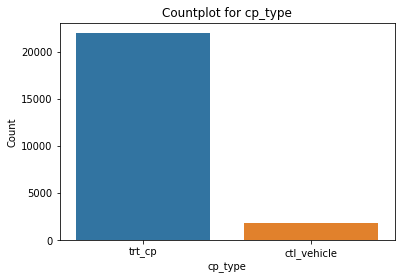

In [9]:
Utils.count_plot(train_feature,"cp_type")

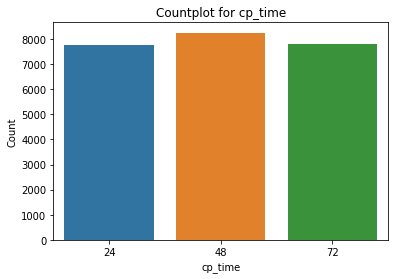

In [10]:
Utils.count_plot(train_feature,"cp_time")

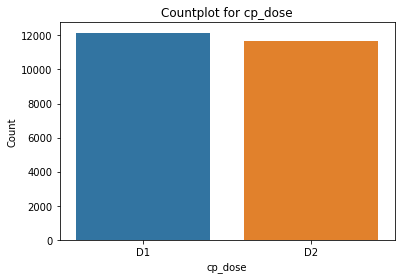

In [11]:
Utils.count_plot(train_feature,"cp_dose")

Distribution plot for ['g-0', 'g-1', 'g-2', 'g-3']


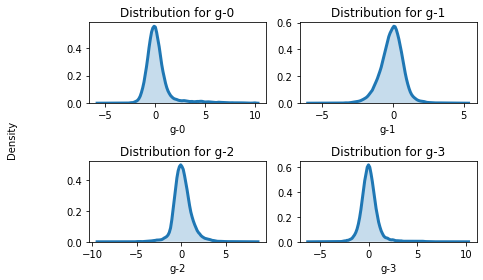

In [12]:
cols=["g-0","g-1","g-2","g-3"]
print(f"Distribution plot for {cols}")
Utils.dist_plot(train_feature,cols,2,2)

In [13]:
cols=["g-0","g-1","g-2","g-3"]
print(f"Data distribution info for {cols}")
df.describe_data(cols)

Data distribution info for ['g-0', 'g-1', 'g-2', 'g-3']


,g-0,g-1,g-2,g-3
count,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971
std,1.393399,0.812363,1.035731,0.950012
min,-5.513000,-5.737000,-9.104000,-5.998000
25%,-0.473075,-0.562200,-0.437750,-0.429575
50%,-0.008850,-0.046600,0.075200,0.008050
75%,0.525700,0.403075,0.663925,0.463400
max,10.000000,5.039000,8.257000,10.000000


Distribution plot for ['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-5']


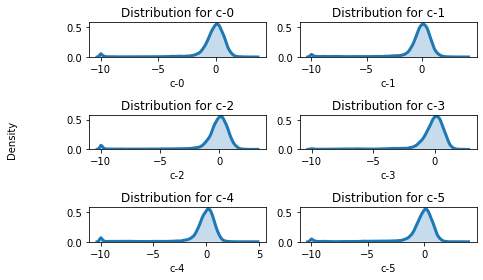

In [14]:
cols=["c-0","c-1","c-2","c-3","c-4","c-5"]
print(f"Distribution plot for {cols}")
Utils.dist_plot(train_feature,cols,3,2)

In [15]:
cols=["c-0","c-1","c-2","c-3","c-4","c-5"]
print(f"Data distribution info for {cols}")
df.describe_data(cols)

Data distribution info for ['c-0', 'c-1', 'c-2', 'c-3', 'c-4', 'c-5']


,c-0,c-1,c-2,c-3,c-4,c-5
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775
50%,-0.009000,0.009800,-0.004000,-0.039050,0.011400,-0.008900
75%,0.448975,0.476875,0.460575,0.413100,0.470300,0.442675
max,3.365000,3.915000,2.970000,2.408000,4.555000,3.614000


Classes with most MOAs


<BarContainer object of 5 artists>

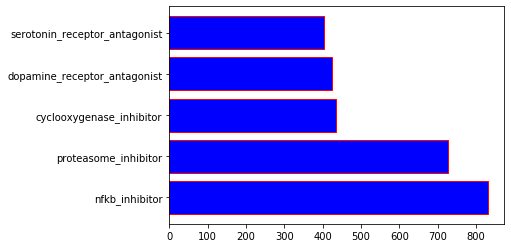

In [16]:
print("Classes with most MOAs")
df2=pd.DataFrame(train_targets_scored.sum(axis=0)[1:].sort_values(ascending=False), columns=['Count']).iloc[0:5,:]

plt.barh(df2.index, df2.values.ravel(), color='blue', edgecolor='red')


Classes with least MOAs


<BarContainer object of 5 artists>

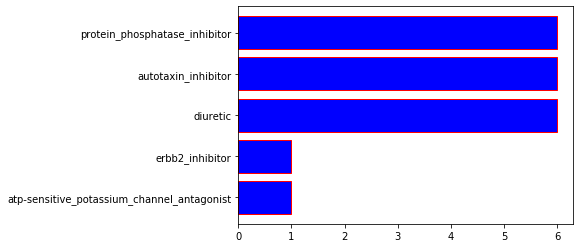

In [17]:
print("Classes with least MOAs")
df2=pd.DataFrame(train_targets_scored.sum(axis=0)[1:].sort_values(ascending=True), columns=['Count']).iloc[0:5,:]

plt.barh(df2.index, df2.values.ravel(), color='blue', edgecolor='red')

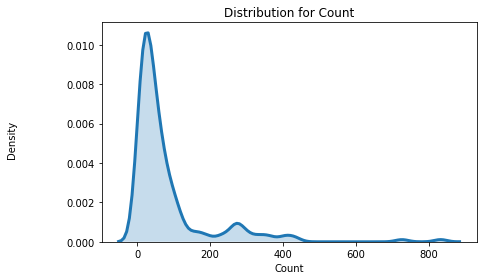

In [18]:
df2=pd.DataFrame(train_targets_scored.sum(axis=0)[1:], columns=['Count'])
Utils.dist_plot(df2,'Count')

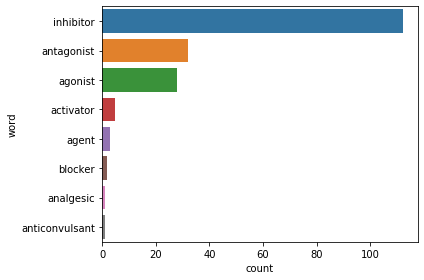

In [19]:
list_word=[]
for i in df2.index:
    word_list = [w for w in i.split('_')]
    list_word.append(word_list[-1])
    
words_count_dict={}
for i in set(list_word):
    temp=list_word.count(i)
    words_count_dict[i]=temp
    
words_count_frame = (pd.DataFrame(words_count_dict.items(),columns=(['word','count']))
                     .sort_values('count',ascending=False)[0:8])
Utils.bar_plot(words_count_frame,'count', 'word')



Count plot for cp_dose=D1


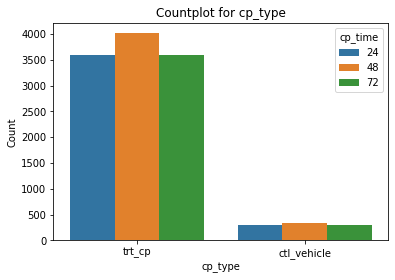

In [20]:
print("Count plot for cp_dose=D1")
Utils.count_plot(train_feature[train_feature['cp_dose']=='D1']
                 ,'cp_type',fv_hue='cp_time')



Count plot for cp_dose=D2


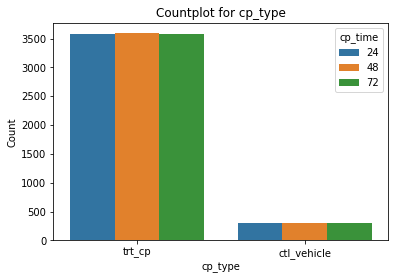

In [21]:
print("Count plot for cp_dose=D2")
Utils.count_plot(train_feature[train_feature['cp_dose']=='D2'],'cp_type'
                 ,fv_hue='cp_time')

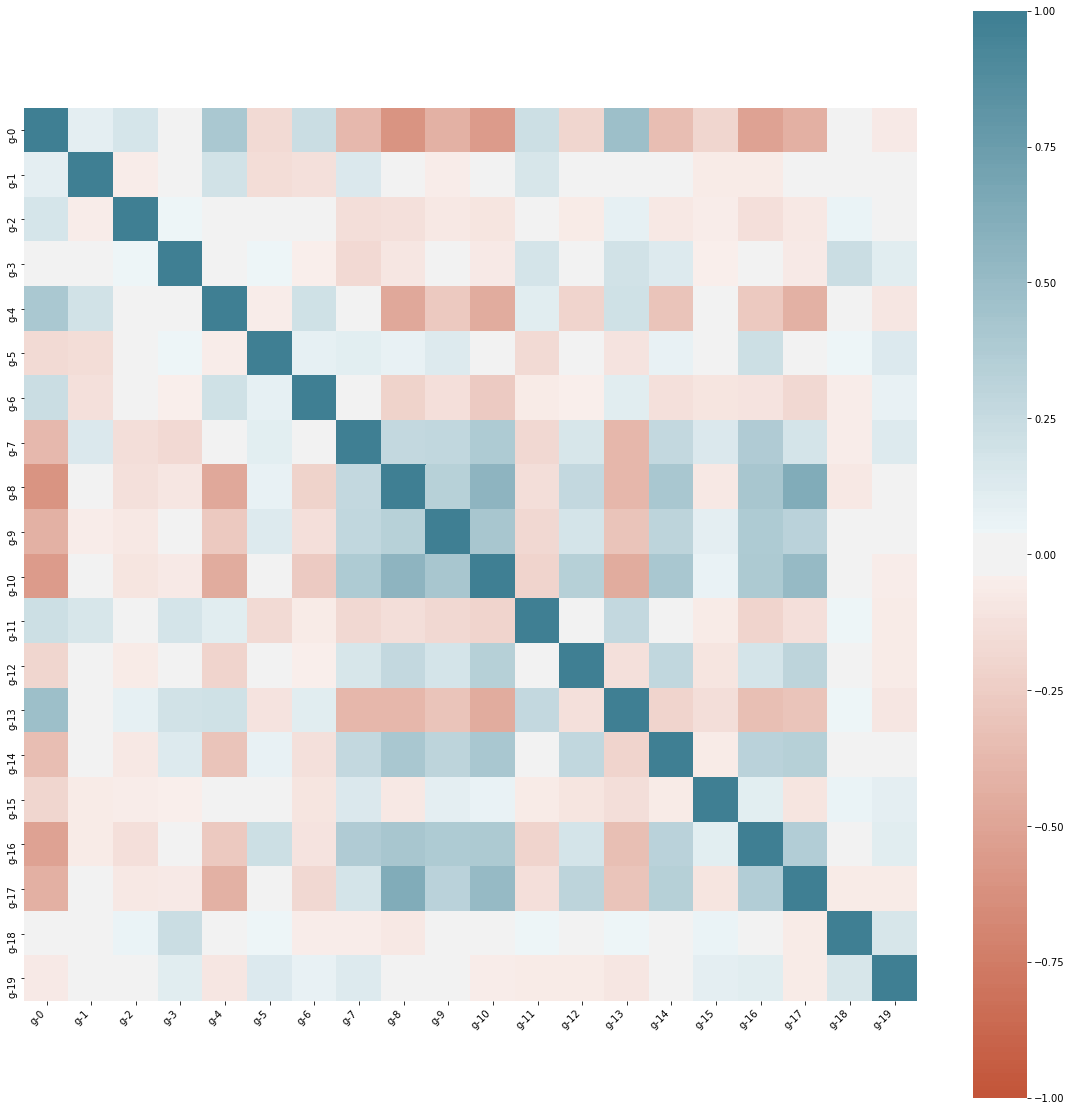

In [22]:
Utils.heatmap(train_feature.iloc[:,4:24],20,20)

Text(0.5, 1.0, 'Correlation: g-8 vs g-17')

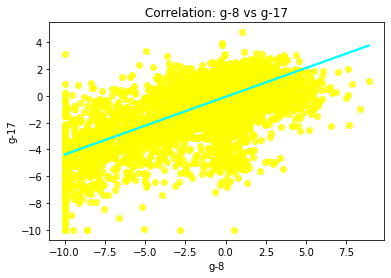

In [23]:
import seaborn as sns
sns.regplot(x="g-8", y="g-17", data=train_feature,color='yellow',line_kws={'color':'cyan'})
plt.title("Correlation: g-8 vs g-17")

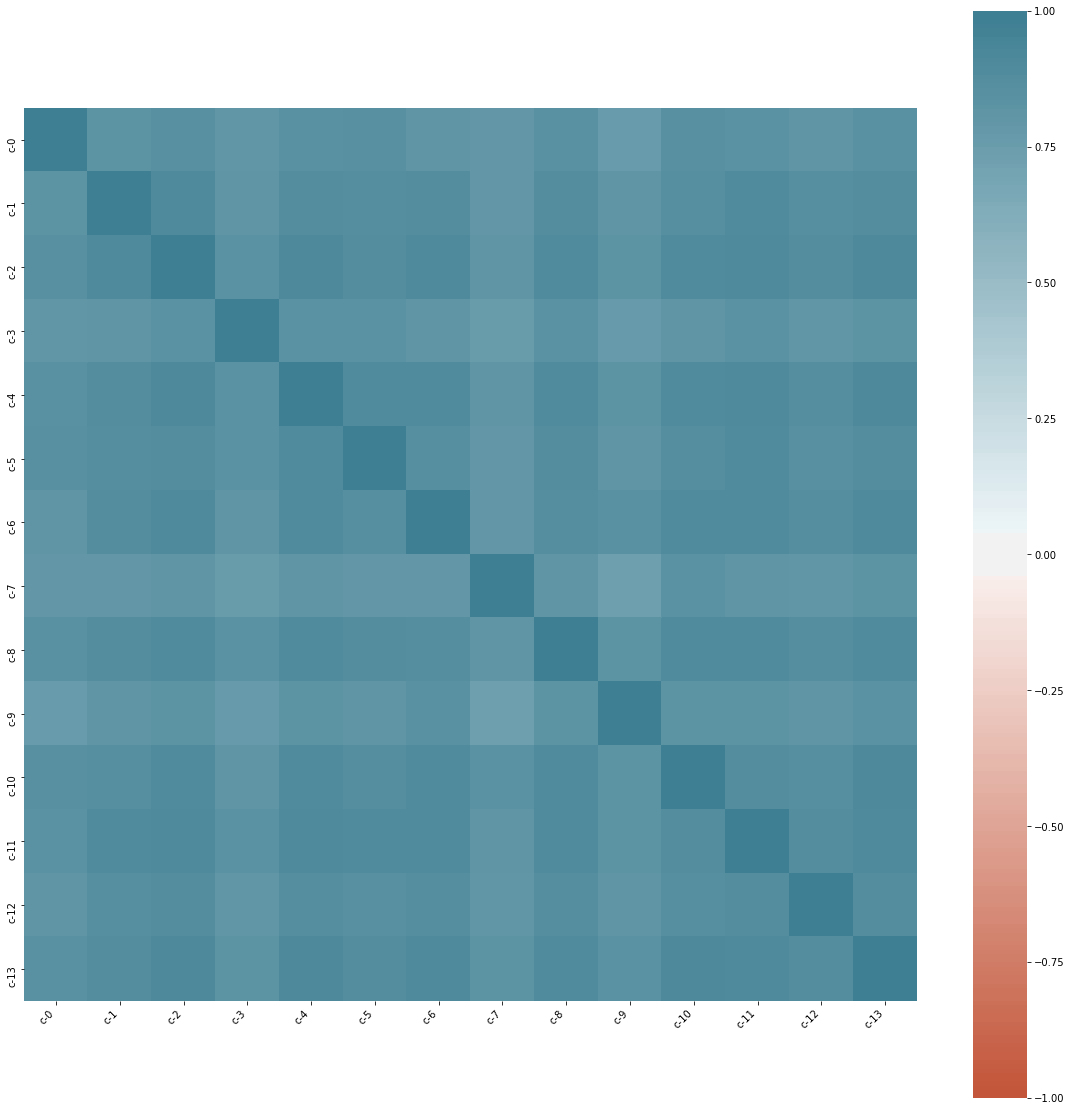

In [24]:
Utils.heatmap(train_feature.iloc[:,776:790],20,20)

Text(0.5, 1.0, 'Correlation: c-0 vs c-6')

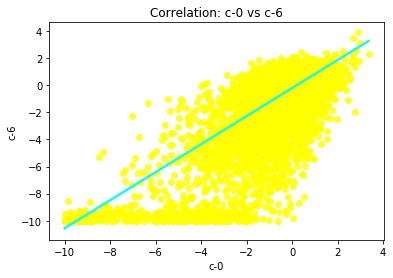

In [25]:
sns.regplot(x="c-0", y="c-6", data=train_feature,color='yellow',line_kws={'color':'cyan'})
plt.title("Correlation: c-0 vs c-6")

Number of Activations per cp_type


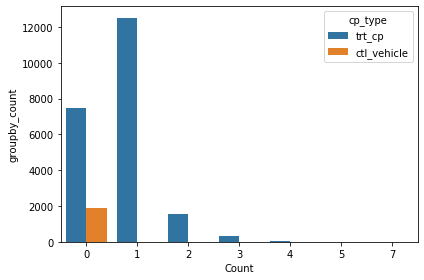

In [26]:
df_temp = pd.DataFrame(train_targets_scored.sum(axis=1),columns=['Count'])
df_temp = pd.concat([train_feature[['sig_id','cp_type']],df_temp],axis=1)
df_temp['groupby_count'] = df_temp.groupby(['cp_type', 'Count']).transform('count')
print("Number of Activations per cp_type")
Utils.bar_plot(df_temp,'Count','groupby_count',fv_hue='cp_type')


([<matplotlib.axis.XTick at 0x7fd54efede90>,
 <a list of 4 Text xticklabel objects>)

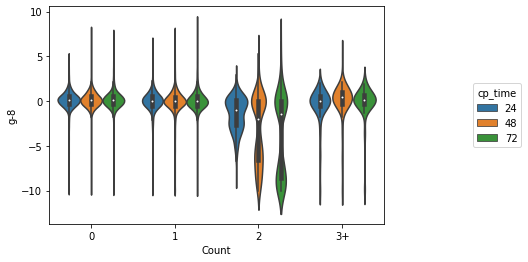

In [27]:
df_temp = pd.DataFrame(train_targets_scored.sum(axis=1),columns=['Count'])
df_temp = pd.concat([train_feature,df_temp],axis=1)
df_temp.loc[df_temp['Count']>=3, 'Count']=3
g=sns.violinplot(x="Count", y="g-8", data=df_temp,hue='cp_time')
g.legend(title='cp_time',loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks([0,1,2,3], ['0','1','2','3+'])

([<matplotlib.axis.XTick at 0x7fd54ec39d90>,
 <a list of 4 Text xticklabel objects>)

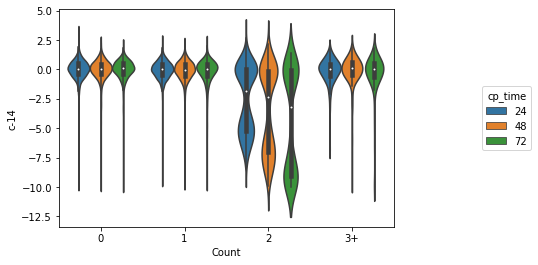

In [28]:
g=sns.violinplot(x="Count", y="c-14", data=df_temp,hue='cp_time')
g.legend(title='cp_time',loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks([0,1,2,3], ['0','1','2','3+'])

([<matplotlib.axis.XTick at 0x7fd54ed21690>,
 <a list of 4 Text xticklabel objects>)

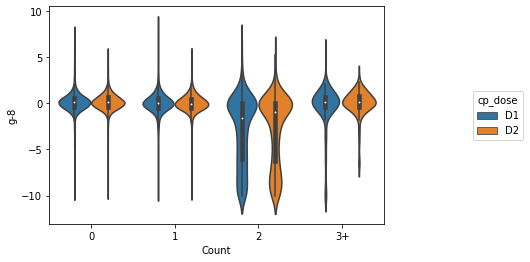

In [29]:
g=sns.violinplot(x="Count", y="g-8", data=df_temp,hue='cp_dose')
g.legend(title='cp_dose',loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks([0,1,2,3], ['0','1','2','3+'])

([<matplotlib.axis.XTick at 0x7fd54c1e1f50>,
 <a list of 4 Text xticklabel objects>)

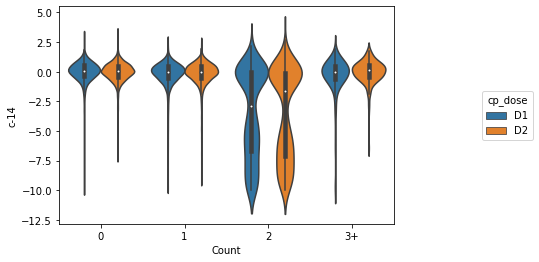

In [30]:
g=sns.violinplot(x="Count", y="c-14", data=df_temp,hue='cp_dose')
g.legend(title='cp_dose',loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xticks([0,1,2,3], ['0','1','2','3+'])

In [31]:
train_feature['g-771']

0       -0.0224
1       -0.2718
2        0.7923
3       -0.0343
4       -0.6269
          ...  
23809    0.3806
23810   -0.4751
23811    0.3603
23812   -0.4741
23813    2.2190
Name: g-771, Length: 23814, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
x = train_feature.iloc[:, 4:776].values
x = StandardScaler().fit_transform(x) 

In [33]:
feat_cols = ['g-'+str(i) for i in range(x.shape[1])]

In [34]:
normalized_gene = pd.DataFrame(x,columns=feat_cols)

In [35]:
from sklearn.decomposition import PCA
pca_moa = PCA(n_components=5)
principalComponents_moa = pca_moa.fit_transform(normalized_gene)

In [36]:
df = pca_moa.explained_variance_ratio_

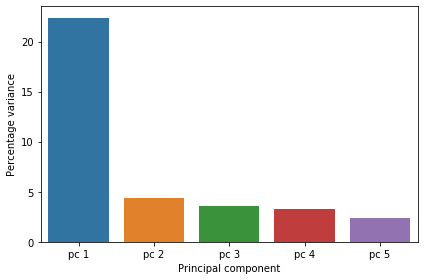

In [37]:
import seaborn as sns
sns.barplot(x=['pc 1', 'pc 2','pc 3','pc 4','pc 5'],y=df*100)
# plt.xticks(rotation=30)
plt.ylabel("Percentage variance")
plt.xlabel("Principal component")
plt.tight_layout()

In [38]:
principalComponents_moa.shape

(23814, 5)

In [39]:
reduced_data = pd.DataFrame(principalComponents_moa,
                            columns=['PC1','PC2','PC3','PC4','PC5'])
df_temp = pd.concat([train_feature.iloc[:,:4],reduced_data],axis=1)

Text(0.5, 1, 'PCA on gene feature by treatment type')

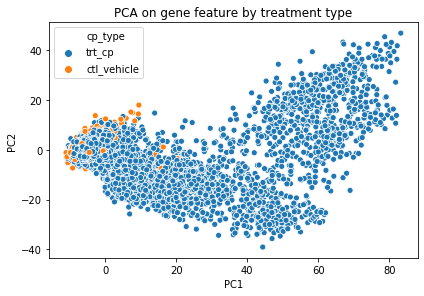

In [40]:
Utils.scatter_plot(df_temp,'PC1','PC2','cp_type')
plt.title("PCA on gene feature by treatment type")

Text(0.5, 1, 'PCA on gene feature by dose type')

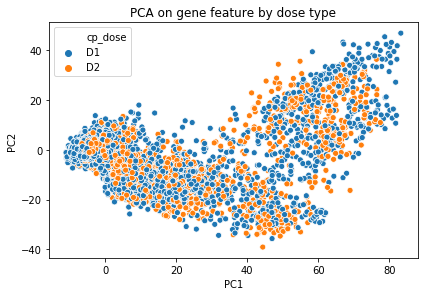

In [41]:
Utils.scatter_plot(df_temp,'PC1','PC2','cp_dose')
plt.title("PCA on gene feature by dose type")

Text(0.5, 1, 'PCA on gene feature by time duration')

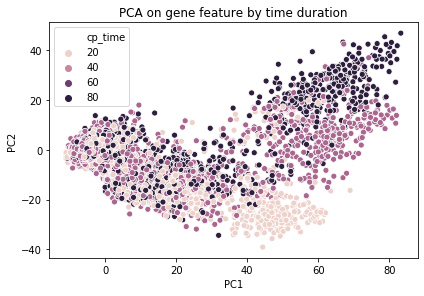

In [45]:
Utils.scatter_plot(df_temp,'PC1','PC2','cp_time')
plt.title("PCA on gene feature by time duration")

Text(0.5, 1, 'PCA on gene feature')

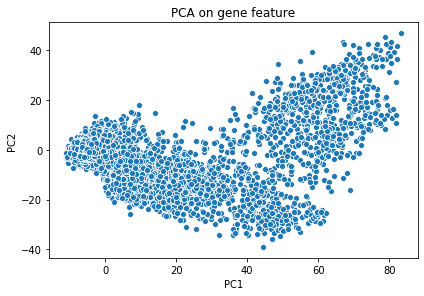

In [48]:
Utils.scatter_plot(df_temp,'PC1','PC2')
plt.title("PCA on gene feature")

In [58]:
x = train_feature.iloc[:, 776:876].values
x = StandardScaler().fit_transform(x) 

In [59]:
feat_cols = ['c-'+str(i) for i in range(x.shape[1])]
normalized_cell = pd.DataFrame(x,columns=feat_cols)

In [60]:
pca_moa = PCA(n_components=5)
principalComponents_moa = pca_moa.fit_transform(normalized_cell)

In [61]:
df = pca_moa.explained_variance_ratio_

In [62]:
reduced_data = pd.DataFrame(principalComponents_moa,
                            columns=['PC1','PC2','PC3','PC4','PC5'])
df_temp = pd.concat([train_feature.iloc[:,:4],reduced_data],axis=1)

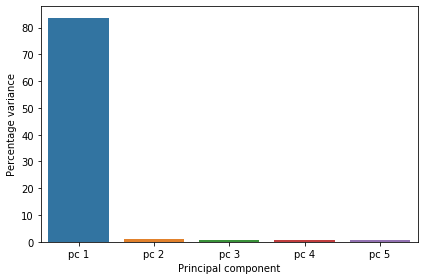

In [63]:
import seaborn as sns
sns.barplot(x=['pc 1', 'pc 2','pc 3','pc 4','pc 5'],y=df*100)
# plt.xticks(rotation=30)
plt.ylabel("Percentage variance")
plt.xlabel("Principal component")
plt.tight_layout()

In [64]:
df

array([0.83754731, 0.0119909 , 0.00813987, 0.00565286, 0.00497187])